# MACHINE LEARNING Linear Regression model on insurance dataset

In [19]:
import pandas as pd
import numpy as np
import os
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config

In [21]:
insurance = pd.read_csv("insurance.csv")

In [22]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
type(insurance)

pandas.core.frame.DataFrame

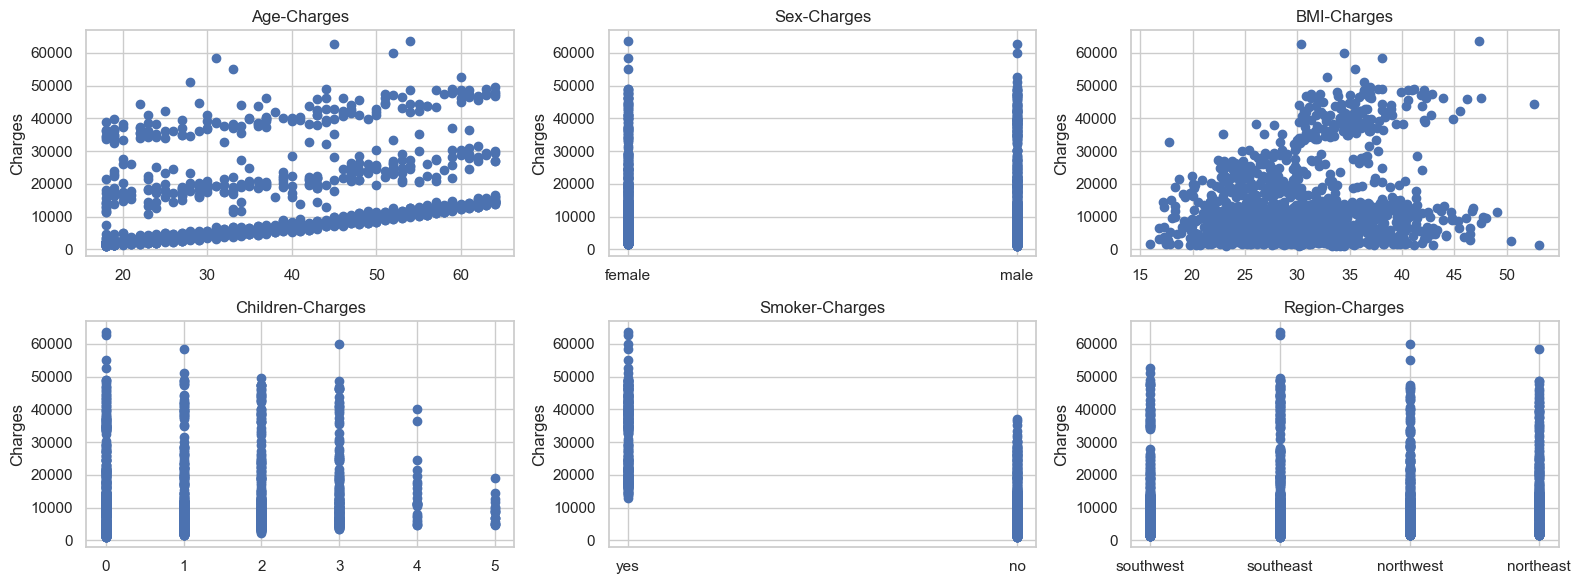

In [24]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,6))

axes[0,0].plot(insurance['age'],insurance['charges'],'o')
axes[0,0].set_ylabel("Charges")

axes[0,1].plot(insurance['sex'],insurance['charges'],'o')
axes[0,1].set_ylabel("Charges")

axes[0,2].plot(insurance['bmi'],insurance['charges'],'o')
axes[0,2].set_ylabel("Charges")

axes[1,0].plot(insurance['children'],insurance['charges'],'o')
axes[1,0].set_ylabel("Charges")

axes[1,1].plot(insurance['smoker'],insurance['charges'],'o')
axes[1,1].set_ylabel("Charges")

axes[1,2].plot(insurance['region'],insurance['charges'],'o')
axes[1,2].set_ylabel("Charges")

axes[0,0].set_title("Age-Charges")
axes[0,1].set_title("Sex-Charges")
axes[0,2].set_title("BMI-Charges")
axes[1,0].set_title("Children-Charges")
axes[1,1].set_title("Smoker-Charges")
axes[1,2].set_title("Region-Charges")
plt.tight_layout();

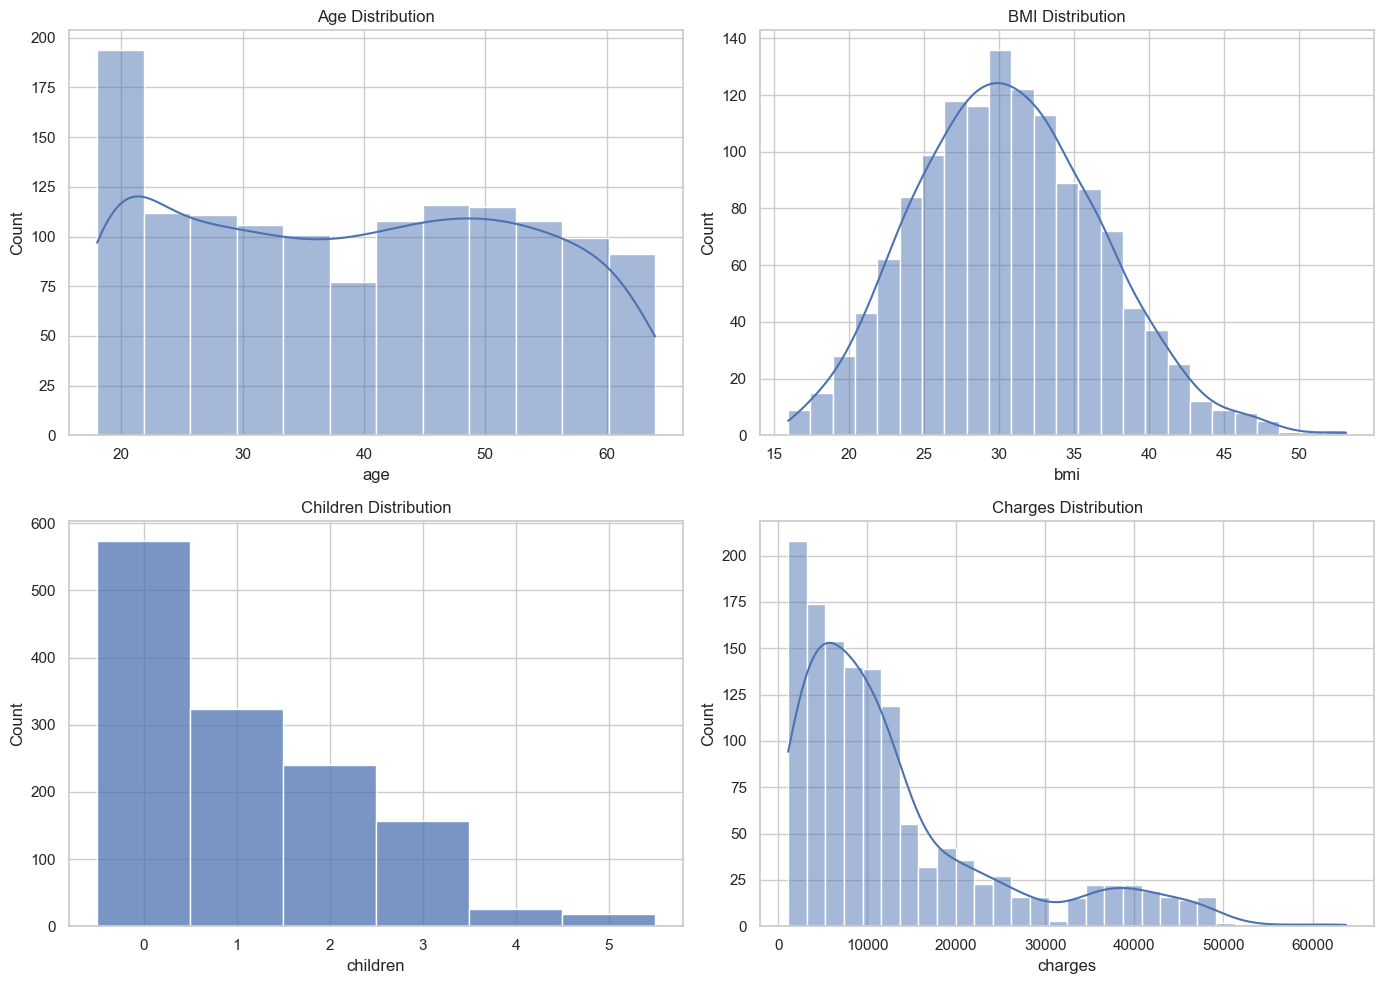

In [25]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(insurance['age'], kde=True, ax=axes[0, 0]).set(title="Age Distribution")

sns.histplot(insurance['bmi'], kde=True, ax=axes[0, 1]).set(title="BMI Distribution")

sns.histplot(insurance['children'], discrete=True, ax=axes[1, 0]).set(title="Children Distribution")

sns.histplot(insurance['charges'], kde=True, ax=axes[1, 1]).set(title="Charges Distribution")

plt.tight_layout()
plt.show()

In [26]:
from sklearn.neighbors import LocalOutlierFactor

In [27]:
lof = LocalOutlierFactor()
outliers = lof.fit_predict(insurance[['age', 'charges']])

insurance['outlier'] = outliers
outlier_data = insurance[insurance['outlier'] == -1]

In [28]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
type(outliers)

numpy.ndarray

In [30]:
insurance

,age,sex,bmi,children,smoker,region,charges,outlier
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,1
1335,18,female,36.850,0,no,southeast,1629.83350,1
1336,21,female,25.800,0,no,southwest,2007.94500,1


In [31]:
insurance[insurance['outlier'] == -1]

,age,sex,bmi,children,smoker,region,charges,outlier
34,28,male,36.400,1,yes,southwest,51194.55914,-1
77,21,male,35.530,0,no,southeast,1532.46970,-1
199,64,female,39.330,0,no,northeast,14901.51670,-1
374,20,male,33.330,0,no,southeast,1391.52870,-1
380,27,female,17.955,2,yes,northeast,15006.57945,-1
398,64,male,25.600,2,no,southwest,14988.43200,-1
462,62,female,38.095,2,no,northeast,15230.32405,-1
478,21,male,36.850,0,no,southeast,1534.30450,-1
543,54,female,47.410,0,yes,southeast,63770.42801,-1
577,31,female,38.095,1,yes,northeast,58571.07448,-1


In [32]:
new_insurance = insurance[insurance['outlier'] != -1]
new_insurance

,age,sex,bmi,children,smoker,region,charges,outlier
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,1
1335,18,female,36.850,0,no,southeast,1629.83350,1
1336,21,female,25.800,0,no,southwest,2007.94500,1


In [257]:
outliers_bmi = lof.fit_predict(new_insurance[['bmi', 'charges']])
new_insurance.loc[:,'outliers_bmi'] = outliers_bmi

outlier_data_2 = new_insurance.loc[new_insurance['outliers_bmi'] == -1]

new_insurance = new_insurance.loc[new_insurance['outliers_bmi'] != -1]

In [258]:
missing_values = new_insurance.isnull().sum()

In [259]:
missing_values

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
charges          0
outlier          0
outliers_bmi     0
less_children    0
bmi_category     0
dtype: int64

In [261]:
from sklearn.preprocessing import LabelEncoder

In [262]:
le = LabelEncoder()
new_insurance.loc[:,'smoker'] = le.fit_transform(new_insurance['smoker'])

In [263]:
new_insurance

,age,sex,bmi,children,smoker,region,charges,outlier,outliers_bmi,less_children,bmi_category
0,19,female,27.900,0,1,southwest,16884.92400,1,1,1,0.0
1,18,male,33.770,1,0,southeast,1725.55230,1,1,1,1.0
2,28,male,33.000,3,0,southeast,4449.46200,1,1,1,1.0
3,33,male,22.705,0,0,northwest,21984.47061,1,1,1,0.0
4,32,male,28.880,0,0,northwest,3866.85520,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,1,1,1,1.0
1334,18,female,31.920,0,0,northeast,2205.98080,1,1,1,1.0
1335,18,female,36.850,0,0,southeast,1629.83350,1,1,1,1.0
1336,21,female,25.800,0,0,southwest,2007.94500,1,1,1,0.0


In [264]:
new_insurance.loc[:,'less_children'] = (new_insurance['children'] <= 3).astype(int)

In [265]:
new_insurance

,age,sex,bmi,children,smoker,region,charges,outlier,outliers_bmi,less_children,bmi_category
0,19,female,27.900,0,1,southwest,16884.92400,1,1,1,0.0
1,18,male,33.770,1,0,southeast,1725.55230,1,1,1,1.0
2,28,male,33.000,3,0,southeast,4449.46200,1,1,1,1.0
3,33,male,22.705,0,0,northwest,21984.47061,1,1,1,0.0
4,32,male,28.880,0,0,northwest,3866.85520,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,1,1,1,1.0
1334,18,female,31.920,0,0,northeast,2205.98080,1,1,1,1.0
1335,18,female,36.850,0,0,southeast,1629.83350,1,1,1,1.0
1336,21,female,25.800,0,0,southwest,2007.94500,1,1,1,0.0


In [266]:
filtered_insurance = new_insurance[new_insurance['children'] > 3]
filtered_insurance

,age,sex,bmi,children,smoker,region,charges,outlier,outliers_bmi,less_children,bmi_category
32,19,female,28.600,5,0,southwest,4687.79700,1,1,0,0.0
61,25,male,33.660,4,0,southeast,4504.66240,1,1,0,1.0
71,31,male,28.500,5,0,northeast,6799.45800,1,1,0,0.0
83,48,female,41.230,4,0,northwest,11033.66170,1,1,0,1.0
165,47,male,28.215,4,0,northeast,10407.08585,1,1,0,0.0
166,20,female,37.000,5,0,southwest,4830.63000,1,1,0,1.0
211,40,male,30.875,4,0,northwest,8162.71625,1,1,0,1.0
258,51,male,24.415,4,0,northwest,11520.09985,1,1,0,0.0
321,26,female,29.640,4,0,northeast,24671.66334,1,1,0,0.0
344,49,female,41.470,4,0,southeast,10977.20630,1,1,0,1.0


In [267]:
conditions = [
    new_insurance['bmi'] < 30,
    (new_insurance['bmi'] >= 30) & (new_insurance['bmi'] <= 45),
    new_insurance['bmi'] > 45
]
choices = [0, 1, 2]

new_insurance.loc[:,'bmi_category'] = np.select(conditions, choices)
new_insurance

,age,sex,bmi,children,smoker,region,charges,outlier,outliers_bmi,less_children,bmi_category
0,19,female,27.900,0,1,southwest,16884.92400,1,1,1,0.0
1,18,male,33.770,1,0,southeast,1725.55230,1,1,1,1.0
2,28,male,33.000,3,0,southeast,4449.46200,1,1,1,1.0
3,33,male,22.705,0,0,northwest,21984.47061,1,1,1,0.0
4,32,male,28.880,0,0,northwest,3866.85520,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,1,1,1,1.0
1334,18,female,31.920,0,0,northeast,2205.98080,1,1,1,1.0
1335,18,female,36.850,0,0,southeast,1629.83350,1,1,1,1.0
1336,21,female,25.800,0,0,southwest,2007.94500,1,1,1,0.0


In [268]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error, mean_squared_error

In [269]:
X = new_insurance[['age', 'bmi', 'children','smoker']]
y = new_insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [270]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [271]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [272]:
y_pred = model.predict(X_test)

In [273]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [274]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

print("Predicted Results:", y_pred)

Mean Squared Error (MSE): 44033989.71320845
Mean Absolute Error (MAE): 4420.028294423048
Root Mean Squared Error (RMSE): 6635.811157138851
Predicted Results: [ 1771.19215587 12359.47935675 13940.89997194 10867.07998878
  9785.33640916  9543.11620525  5432.42846756  4443.29958674
  9941.1850609  32053.87740344 10694.65389613 15672.45145678
  2240.60112078 32539.36809526 36061.85054123  3797.2527973
  4910.07746904 28516.20357402  3755.53040069  7268.38460129
 13920.90778174 34711.51583439 10772.5061965  15699.73148533
  1100.42439498  7030.18153746  9018.51816058 25074.81219832
  1216.90966955  3513.22485534   886.99828924 14842.00190287
  4951.17084299  2446.09432664 10739.38839314  8034.6431298
 13993.1063061   4172.75436679 26102.66741421  3191.65432029
  9760.58608293 33712.41734247  1592.33391704 32267.3461799
 35551.4628986  29359.42405943 39662.84366502  5340.25908837
  7808.43535021  1506.45807887 11281.9715673  10261.93985157
 27592.83834846 13579.16907712  7171.37174463 11001.

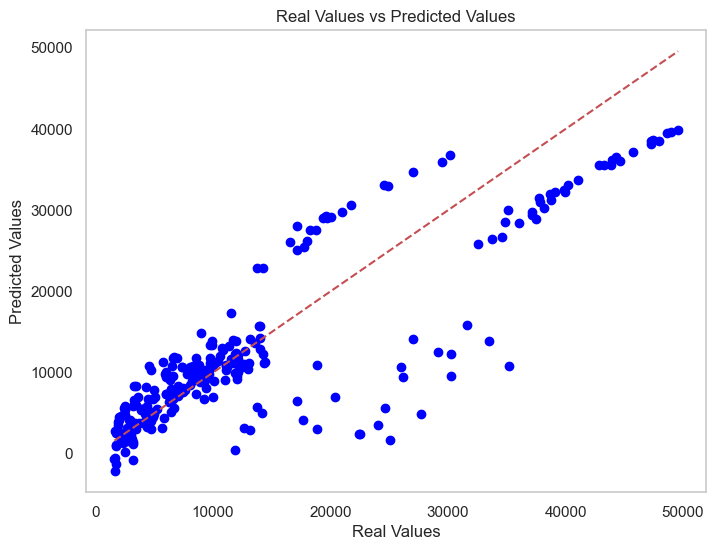

In [275]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real Values vs Predicted Values")
plt.grid()
plt.show()